# Data Analysis
We have three different datasets (aigues de Barcelona, Viladecans and Clima). Each one consists of the same game but in different context. For us the game context itself has no importance. Either way we are going to differentiate at first to load them free of headaches.

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math

import re

## Aigues de Barcelona

In [8]:
games = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Aigua/aiguadebarri_games.csv')
participants = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Aigua/aiguadebarri_participants.csv')
user_evo_aigua = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Aigua/aiguadebarri_participants_contributions.csv')

In [9]:
participants.head()

frame_1 survey_2 frame_3 frame_2  selections  endowment_begin gender age  \
0      r3       r3      r1      r1          10               40      W  r5   
1      r3       r3      r1      r3          10               40      M  r5   
2      r3       r2      r1      r1          10               40      M  r4   
3      r3       r2      r1      r2          10               40      W  r4   
4      r3       r3      r1      r3          10               40      W  r8   

  survey_4  contributed survey_1 survey_3  finished  verification  \
0       r1           26       r1       r3         1             1   
1       r1           36       r3       r3         1             1   
2       r1           10       r1       r2         1             1   
3       r3           24       r1       r3         1             1   
4       r3           26       r1       r3         1             1   

   participant_id  game_id  bots education  endowment_end  
0               2        1     0        r6             14  
1               3        1     0        r3              4  
2               4        1     0        r5             30  
3               5        1     0        r5             16  
4               6        1     0        r3             14

In [10]:
contributions.head()

NameError: name 'contributions' is not defined

In [11]:
games.head()

game_id                                          evolution  contributed  \
0        1  [14L, 30L, 48L, 66L, 80L, 98L, 110L, 126L, 132...          138   
1        2  [12L, 28L, 48L, 60L, 74L, 92L, 110L, 116L, 124...          126   
2        3  [16L, 30L, 48L, 64L, 78L, 94L, 108L, 120L, 122...          122   
3        4  [16L, 28L, 40L, 58L, 72L, 84L, 98L, 108L, 122L...          132   
4        5  [14L, 34L, 44L, 58L, 70L, 86L, 100L, 116L, 128...          138   

   goal_achieved  
0              1  
1              1  
2              1  
3              1  
4              1

## Viladecans

In [129]:
partida = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Viladecans/partida.csv')
ronda = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Viladecans/ronda.csv')
user_vila = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Viladecans/user.csv')
user_ronda = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Viladecans/userronda.csv')

In [13]:
partida.head()

id  num_session  num_rounds  num_players  win_if_fails comment  \
0   1            1          10            6             0     NaN   
1   2            2          10            6             1     NaN   
2   3            3          10            6             1     NaN   
3   4            4          10            6             0     NaN   
4   5            5          10            6             0     NaN   

   goal_reached  
0             1  
1             1  
2             1  
3             1  
4             1

In [14]:
ronda.head(20)

id  num_round  start_pot  end_pot  session_id
0    1          1        120      104           1
1    2          2        104       90           1
2    3          3         90       76           1
3    4          4         76       58           1
4    5          5         58       44           1
5    6          6         44       28           1
6    7          7         28       12           1
7    8          8         12       -8           1
8    9          9         -8      -14           1
9   10         10        -14      -16           1
10  11          1        120      114           2
11  12          2        114      102           2
12  13          3        102       88           2
13  14          4         88       72           2
14  15          5         72       58           2
15  16          6         58       42           2
16  17          7         42       18           2
17  18          8         18        6           2
18  19          9          6        0           2
19  20         10          0       -4           2

In [15]:
user.columns

Index(['id', 'codi_postal', 'genere', 'rang_edat', 'nivell_estudis',
       'situacio_laboral', 'estat_civil', 'acabat', 'diners_inicials',
       'num_seleccions', 'guany_final', 'partida_id', 'origen', 'pais',
       'residencia', 'enquesta_final_pr1', 'enquesta_final_pr2',
       'enquesta_final_pr3', 'enquesta_final_pr4', 'enquesta_final_pr5',
       'enquesta_final_pr6', 'enquesta_final_pr7', 'enquesta_final_pr8',
       'enquesta_final_pr9', 'enquesta_final_pr10', 'enquesta_final_pr11',
       'enquesta_final_pr12', 'enquesta_final_pr13', 'bots'],
      dtype='object')

In [16]:
user_ronda.head()

id  has_selected  option_selected  round_id  user_id
0   1             1                2         1        1
1   2             1                2         1        2
2   3             1                4         1        3
3   4             1                4         1        4
4   5             1                2         1        5

## Clima

In [17]:
round_cccb = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/round_CCCB.csv')
round_ciutadella = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/round_ciutadella.csv')
# user_cccb = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/user_CCCB.csv')
user_round_ciutadella = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/userround_ciutadella.csv')
user_round_cccb = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/userround_CCCB.csv')
# user_ciutadella = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/user_ciutadella.csv')
session_cccb = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/session_CCCB.csv')
session_ciutadella = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/session_ciutadella.csv')

### Something is happening with the user data. Error seen below.

In [18]:
user_cccb = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/user_CCCB.csv')

In [19]:
round_cccb.head(200)

id  num_round  session_id  start_pot  end_pot
0      1          1           1        120      102
1      2          2           1        102       84
2      3          3           1         84       70
3      4          4           1         70       52
4      5          5           1         52       30
..   ...        ...         ...        ...      ...
195  196          6          20         38       24
196  197          7          20         24       16
197  198          8          20         16        6
198  199          9          20          6        2
199  200         10          20          2       -2

[200 rows x 5 columns]

# Feature Engineering

## xAigua: 
Remember that you have 3 different datasets.*games, participants* and *contributions*.

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   game_id        21 non-null     int64 
 1   evolution      21 non-null     object
 2   contributed    21 non-null     int64 
 3   goal_achieved  21 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 800.0+ bytes


In [21]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   frame_1          125 non-null    object
 1   survey_2         125 non-null    object
 2   frame_3          125 non-null    object
 3   frame_2          125 non-null    object
 4   selections       126 non-null    int64 
 5   endowment_begin  126 non-null    int64 
 6   gender           121 non-null    object
 7   age              125 non-null    object
 8   survey_4         125 non-null    object
 9   contributed      126 non-null    int64 
 10  survey_1         125 non-null    object
 11  survey_3         125 non-null    object
 12  finished         126 non-null    int64 
 13  verification     126 non-null    int64 
 14  participant_id   126 non-null    int64 
 15  game_id          126 non-null    int64 
 16  bots             126 non-null    int64 
 17  education        125 non-null    ob

In [22]:
# From here we can conclude that we have 6 players per game.

user_evo_aigua['game_id'].value_counts().head()

1     6
12    6
20    6
19    6
18    6
Name: game_id, dtype: int64

In [23]:
user_evo_aigua['contribution'].head()

0    [2L, 4L, 4L, 2L, 4L, 4L, 4L, 2L, 0L, 0L]
1    [4L, 4L, 2L, 4L, 4L, 4L, 2L, 4L, 4L, 4L]
2    [2L, 2L, 2L, 2L, 0L, 2L, 0L, 0L, 0L, 0L]
3    [2L, 2L, 4L, 4L, 2L, 2L, 2L, 4L, 0L, 2L]
4    [2L, 4L, 4L, 2L, 4L, 4L, 0L, 4L, 2L, 0L]
Name: contribution, dtype: object

In [24]:
# Let's take a look at how people contribute. We have a list inside a Serie. Let's change it.

regex_work = user_evo_aigua['contribution'][1]

regex_work

'[4L, 4L, 2L, 4L, 4L, 4L, 2L, 4L, 4L, 4L]'

In [25]:
# Here we can observe how each person will contribute per round. Now it's a list.

def contributions_separation(string):
    return [int(i) for i in re.findall('[0-9]+', string)]

contributions_separation(regex_work)

[4, 4, 2, 4, 4, 4, 2, 4, 4, 4]

In [26]:
array_tank = user_evo_aigua['contribution'].apply(contributions_separation)

array_tank

0      [2, 4, 4, 2, 4, 4, 4, 2, 0, 0]
1      [4, 4, 2, 4, 4, 4, 2, 4, 4, 4]
2      [2, 2, 2, 2, 0, 2, 0, 0, 0, 0]
3      [2, 2, 4, 4, 2, 2, 2, 4, 0, 2]
4      [2, 4, 4, 2, 4, 4, 0, 4, 2, 0]
                    ...              
121    [0, 0, 0, 0, 4, 0, 0, 4, 0, 4]
122    [4, 0, 2, 4, 4, 2, 4, 0, 0, 4]
123    [2, 0, 2, 4, 2, 2, 0, 4, 4, 4]
124    [0, 2, 0, 4, 4, 4, 2, 2, 2, 4]
125    [4, 0, 0, 0, 0, 4, 0, 0, 0, 0]
Name: contribution, Length: 126, dtype: object

In [27]:
# Introduction into our contributions dataframe.
for j in range(0, len(array_tank)):
    for i in range(1, 11):
        user_evo_aigua.loc[[j],['c'+str(i)]] = array_tank[j][i-1]

In [28]:
user_evo_aigua.drop(labels='contribution', axis=1, inplace=True)

In [29]:
user_evo_aigua['e0'] = 0
for i in range(10):
    user_evo_aigua['e'+str(i+1)] = user_evo_aigua['e'+str(i)] + user_evo_aigua['c'+str(i+1)]

In [30]:
for i in range(1, 11):
    user_evo_aigua['min_e'+str(i)] = np.repeat(np.asarray(user_evo_aigua.groupby('game_id').min('e'+str(i))['e'+str(i)]),6)
    user_evo_aigua['max_e'+str(i)] = np.repeat(np.asarray(user_evo_aigua.groupby('game_id').max('e'+str(i))['e'+str(i)]),6)
    user_evo_aigua['mean_e'+str(i)] = np.repeat(np.asarray(user_evo_aigua.groupby('game_id').mean('e'+str(i))['e'+str(i)]),6)



In [31]:
# Searching where we have arrived to the objective
we_120_aigua = []
for j in range(1, 22):
    for i in range(1, 11):
        if sum(user_evo_aigua[user_evo_aigua['game_id'] == j]['e'+str(i)]) > 120:
            we_120_aigua.append(i)
            break

### Gini Index

$ G = \frac{\sum \limits _{i=1}^{n} \sum \limits _{j=1}^{n} |x_{i}-x_{j}|}{2n^{2}\bar{x}} $

In [32]:
# Gini Index fot all the games. We are going to use some dictionaries.
gini_dict = {}

for l in range(1, 22):
    gini_dict['game%s' % l] = []
    # Gini Index for all the evolution and appending it into a list for only one id.
    for k in range(1, 11):
        x = np.asarray(user_evo_aigua[user_evo_aigua['game_id'] == l]['e'+str(k)])
        x_mean = np.asarray(user_evo_aigua[user_evo_aigua['game_id'] == l]['mean_e' + str(k)])
        gini_num = 0
        gini = []
        
        # Gini Index for one step of the evolution.
        for i in range(len(x)):
            for j in range(len(x)):
                gini_num = gini_num + np.abs(x[i]-x[j])

        gini.append(gini_num/(2*len(x)**2*x_mean)[0])
        
        gini_dict['game' +str(l)].append(gini)

In [33]:
# Take a look at if the position of the bot matters. If not we could put only the number of bots.
user_evo_aigua['bots'].value_counts()

[False, False, False, False, False, False, False, False, False, False]    120
[True, False, False, False, False, False, False, False, False, False]       3
[False, False, False, False, True, True, True, True, True, True]            1
[True, False, True, True, True, True, True, True, True, False]              1
[False, False, False, False, True, False, False, False, False, False]       1
Name: bots, dtype: int64

    'gender': 
        r1: Home, 
        r2: Dona, 
        r3: No binària, 
        r4: No vull contestar
    'age': 
        r1: Menor de 14, 
        r2: 14 - 17, 
        r3: 18 - 24, 
        r4: 25 - 34, 
        r5: 35 - 44, 
        r6: 45 - 54, 
        r7: 55 - 64, 
        r8: Major de 65
    'education': 
        r1: Cap, 
        r2: Obligatoris (primària, EGB, ESO), 
        r3: Secundaris generals (batxillerat, PREU, BUP, COU), 
        r4: Secundaris professionals (comerç, FP1, FP2, mòduls, grau mitja/superior), 
        r5: Universitaris (grau, diplomatura, llicenciatura, màster, postgrau, doctorat),
        r6: Altres
    'frame_1': Quant valores l’aigua?,
        r1: Poc,
        r2: Normal,
        r3: Molt
    'frame_2': Et preocupa una possible manca d’aigua a Collblanc-La Torrassa?,
        r1: Poc,
        r2: Normal,
        r3: Molt 
    'frame_3': Estaríes disposat/da a realitzar una acció col·lectiva per paliar una possible manca d’aigua de Collblanc-La Torrassa?,
        r1: Sí
        r2: No
    'survey_1': Al principi del joc, esperaves aconseguir l'objectiu comú?
        r1: Sí
        r2: No
        r3: No ho sé
    'survey_2': En el joc, si els altres contribueixen poc, jo també he de contribuir poc. Si els altres contribueixen molt, jo també he de contribuir molt.
        r1: Totalment en desacord
        r2: En desacord
        r3: Ni d'acord ni en desacord
        r4: D'acord
        r5: Totalment d'acord
    'survey_3': Participes de la vida comunitària del teu veïnat?
        r1: Mai
        r2: Rarament
        r3: A vegades
        r4: Habitualment
        r5: Sempre
    'survey_4': Com d'important creus que és el problema de la manca d’aigua comparat amb d’altres problemàtiques que s'enfronta Collblanc-La Torrassa?
        r1: Molt menys important
        r2: Menys important
        r3: Igualment important
        r4: Més important
        r5: Molt  més important

In [34]:
# La idea seria passar totes les dades al màxim númeric possible per a poder-les tractar.

participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   frame_1          125 non-null    object
 1   survey_2         125 non-null    object
 2   frame_3          125 non-null    object
 3   frame_2          125 non-null    object
 4   selections       126 non-null    int64 
 5   endowment_begin  126 non-null    int64 
 6   gender           121 non-null    object
 7   age              125 non-null    object
 8   survey_4         125 non-null    object
 9   contributed      126 non-null    int64 
 10  survey_1         125 non-null    object
 11  survey_3         125 non-null    object
 12  finished         126 non-null    int64 
 13  verification     126 non-null    int64 
 14  participant_id   126 non-null    int64 
 15  game_id          126 non-null    int64 
 16  bots             126 non-null    int64 
 17  education        125 non-null    ob

In [35]:
participants.head()

frame_1 survey_2 frame_3 frame_2  selections  endowment_begin gender age  \
0      r3       r3      r1      r1          10               40      W  r5   
1      r3       r3      r1      r3          10               40      M  r5   
2      r3       r2      r1      r1          10               40      M  r4   
3      r3       r2      r1      r2          10               40      W  r4   
4      r3       r3      r1      r3          10               40      W  r8   

  survey_4  contributed survey_1 survey_3  finished  verification  \
0       r1           26       r1       r3         1             1   
1       r1           36       r3       r3         1             1   
2       r1           10       r1       r2         1             1   
3       r3           24       r1       r3         1             1   
4       r3           26       r1       r3         1             1   

   participant_id  game_id  bots education  endowment_end  
0               2        1     0        r6             14  
1               3        1     0        r3              4  
2               4        1     0        r5             30  
3               5        1     0        r5             16  
4               6        1     0        r3             14

In [36]:
# Here we will do the same thing that we've done before. Pass the evolution into a numeric value separable for each
# step of the game.
games.head()

game_id                                          evolution  contributed  \
0        1  [14L, 30L, 48L, 66L, 80L, 98L, 110L, 126L, 132...          138   
1        2  [12L, 28L, 48L, 60L, 74L, 92L, 110L, 116L, 124...          126   
2        3  [16L, 30L, 48L, 64L, 78L, 94L, 108L, 120L, 122...          122   
3        4  [16L, 28L, 40L, 58L, 72L, 84L, 98L, 108L, 122L...          132   
4        5  [14L, 34L, 44L, 58L, 70L, 86L, 100L, 116L, 128...          138   

   goal_achieved  
0              1  
1              1  
2              1  
3              1  
4              1

In [37]:
len(games['evolution'])

21

In [38]:
array_tank = games['evolution'].apply(contributions_separation)

for j in range(0, len(array_tank)):
    for i in range(1, 11):
        games.loc[[j],['e'+str(i)]] = array_tank[j][i-1]

In [39]:
games.drop(labels='evolution', axis=1, inplace=True)

In [40]:
games.head()

game_id  contributed  goal_achieved    e1    e2    e3    e4    e5    e6  \
0        1          138              1  14.0  30.0  48.0  66.0  80.0  98.0   
1        2          126              1  12.0  28.0  48.0  60.0  74.0  92.0   
2        3          122              1  16.0  30.0  48.0  64.0  78.0  94.0   
3        4          132              1  16.0  28.0  40.0  58.0  72.0  84.0   
4        5          138              1  14.0  34.0  44.0  58.0  70.0  86.0   

      e7     e8     e9    e10  
0  110.0  126.0  132.0  138.0  
1  110.0  116.0  124.0  126.0  
2  108.0  120.0  122.0  122.0  
3   98.0  108.0  122.0  132.0  
4  100.0  116.0  128.0  138.0

## xViladecans
Here we do have 4 different datasets. *partida, ronda, user* and *user_ronda*

In [41]:
partida.head(40)

id  num_session  num_rounds  num_players  win_if_fails         comment  \
0    1            1          10            6             0             NaN   
1    2            2          10            6             1             NaN   
2    3            3          10            6             1             NaN   
3    4            4          10            6             0             NaN   
4    5            5          10            6             0             NaN   
5    6            6          10            6             0             NaN   
6    7            7          10            6             1             NaN   
7    8            8          10            6             0             NaN   
8    9            9          10            6             0             NaN   
9   10           10          10            6             0             NaN   
10  11           11          10            6             0  Game not valid   
11  12           12          10            6             1             NaN   
12  13           13          10            6             1             NaN   
13  14           14          10            6             1             NaN   
14  15           15          10            6             1             NaN   
15  16           16          10            6             1             NaN   
16  17           17          10            6             0             NaN   
17  18           18          10            6             1             NaN   
18  19           19          10            6             1             NaN   
19  20           20          10            6             0             NaN   
20  21           21          10            6             0             NaN   
21  22           22          10            6             1             NaN   
22  23           23          10            6             1             NaN   
23  24           24          10            6             0             NaN   
24  25           25          10            6             1             NaN   
25  26           26          10            6             0             NaN   
26  27           27          10            6             1             NaN   
27  28           28          10            6             1             NaN   
28  29           29          10            6             1             NaN   
29  30           30          10            6             1             NaN   

    goal_reached  
0              1  
1              1  
2              1  
3              1  
4              1  
5              1  
6              1  
7              1  
8              1  
9              0  
10             1  
11             1  
12             1  
13             1  
14             1  
15             1  
16             1  
17             1  
18             1  
19             1  
20             1  
21             1  
22             1  
23             1  
24             1  
25             1  
26             1  
27             1  
28             1  
29             1

In [42]:
partida['num_players'].value_counts()

6    30
Name: num_players, dtype: int64

In [43]:
ronda.head(50) # No entenc els valors negatius.

id  num_round  start_pot  end_pot  session_id
0    1          1        120      104           1
1    2          2        104       90           1
2    3          3         90       76           1
3    4          4         76       58           1
4    5          5         58       44           1
5    6          6         44       28           1
6    7          7         28       12           1
7    8          8         12       -8           1
8    9          9         -8      -14           1
9   10         10        -14      -16           1
10  11          1        120      114           2
11  12          2        114      102           2
12  13          3        102       88           2
13  14          4         88       72           2
14  15          5         72       58           2
15  16          6         58       42           2
16  17          7         42       18           2
17  18          8         18        6           2
18  19          9          6        0           2
19  20         10          0       -4           2
20  21          1        120      106           3
21  22          2        106       86           3
22  23          3         86       72           3
23  24          4         72       58           3
24  25          5         58       38           3
25  26          6         38       24           3
26  27          7         24       10           3
27  28          8         10       -8           3
28  29          9         -8      -12           3
29  30         10        -12      -24           3
30  31          1        120      106           4
31  32          2        106       86           4
32  33          3         86       70           4
33  34          4         70       60           4
34  35          5         60       44           4
35  36          6         44       28           4
36  37          7         28       14           4
37  38          8         14        0           4
38  39          9          0        0           4
39  40         10          0       -6           4
40  41          1        120      110           5
41  42          2        110       94           5
42  43          3         94       76           5
43  44          4         76       60           5
44  45          5         60       42           5
45  46          6         42       22           5
46  47          7         22        8           5
47  48          8          8       -2           5
48  49          9         -2       -4           5
49  50         10         -4       -4           5

In [44]:
user.head()

id  codi_postal genere rang_edat nivell_estudis situacio_laboral  \
0   1         8840      F        r6             r2               r1   
1   2         8840      M        r6             r7               r1   
2   3         8840      M        r7             r4               r1   
3   4         8840      F        r7             r2               r1   
4   5         8840      M        r4             r6               r3   

  estat_civil  acabat  diners_inicials  num_seleccions  ...  \
0          r1       1               40              10  ...   
1          r4       1               40              10  ...   
2          r2       1               40              10  ...   
3          r5       0               40               6  ...   
4          r2       1               40              10  ...   

   enquesta_final_pr5  enquesta_final_pr6 enquesta_final_pr7  \
0                  r2                  r9                 r7   
1                  r1                  na                 r3   
2                  r2                 r11                 r2   
3                 NaN                 NaN                NaN   
4                  r1                  na                 r2   

  enquesta_final_pr8 enquesta_final_pr9 enquesta_final_pr10  \
0                 r4                 r2                  r1   
1                 r5                 r1                  r1   
2                 r3                 r1                  r2   
3                NaN                NaN                 NaN   
4                 r2                 r4                  r4   

  enquesta_final_pr11 enquesta_final_pr12  \
0                  r2                  r3   
1                  r1         r1 r2 r3 r4   
2                  r1                  r5   
3                 NaN                 NaN   
4                  r2                  r1   

                                 enquesta_final_pr13 bots  
0  Mas plantas y que los nií±os tengan mas espaci...    0  
1                             Todo zona peatonal\r\r    0  
2                      La mejora en la pavimentacion    0  
3                                                NaN    4  
4                  Un parque mas grande zonas verdee    0  

[5 rows x 29 columns]

In [45]:
user_ronda.iloc[600:661]

id  has_selected  option_selected  round_id  user_id
600  601             1                0       101       61
601  602             1                0       101       62
602  603             1                4       101       63
603  604             1                2       101       64
604  605             1                4       101       65
..   ...           ...              ...       ...      ...
656  657             1                2       110       63
657  658             1                0       110       64
658  659             1                0       110       65
659  660             1                0       110       66
660  661             1                4       111       67

[61 rows x 5 columns]

In [139]:
# Trying to grab all the data in one.

user_evo = {}
for i in range(1, 182):
    if (len(np.asarray(user_ronda[user_ronda['user_id']==i]['option_selected'])) == 10):
        user_evo['user%s' % i] = np.asarray(user_ronda[user_ronda['user_id']==i]['option_selected'])
    else:
        # user_evo['user%s' % i] = np.zeros(10)
        pass
    # You have to equalize the length of all the vectors to put into a dataframe.
user_evo = pd.DataFrame.from_dict(user_evo, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10'], orient='index')

In [140]:
np.asarray(user_ronda[user_ronda['user_id']==5]['option_selected'])

array([2, 4, 2, 0, 0, 2, 2, 4, 2, 2])

In [141]:
user_evo['e0'] = 0
for i in range(10):
    user_evo['e'+str(i+1)] = user_evo['e'+str(i)] + user_evo['c'+str(i+1)]

In [142]:
# user_evo['game_id']
user_evo = user_evo.reset_index().reset_index()

In [143]:
user_evo['group_id'] = user_evo['level_0']//6

In [144]:
user_evo.set_index('index', inplace=True)

In [145]:
user_evo.drop('level_0',axis=1, inplace=True)

In [146]:
user_evo.drop('user181', inplace=True)

In [147]:
user_evo.head(6)['e1']

index
user1    2
user2    2
user3    4
user4    4
user5    2
user6    2
Name: e1, dtype: int64

In [148]:
user_evo.head()

c1  c2  c3  c4  c5  c6  c7  c8  c9  c10  ...  e2  e3  e4  e5  e6  e7  \
index                                           ...                           
user1   2   0   2   4   2   0   4   2   0    0  ...   2   4   8  10  10  14   
user2   2   2   2   2   2   2   2   4   2    0  ...   4   6   8  10  12  14   
user3   4   2   2   4   4   4   4   4   2    0  ...   6   8  12  16  20  24   
user4   4   2   4   4   4   4   2   2   0    0  ...   6  10  14  18  22  24   
user5   2   4   2   0   0   2   2   4   2    2  ...   6   8   8   8  10  12   

       e8  e9  e10  group_id  
index                         
user1  16  16   16         0  
user2  18  20   20         0  
user3  28  30   30         0  
user4  26  26   26         0  
user5  16  18   20         0  

[5 rows x 22 columns]

In [149]:
we_120_vila = []
for j in range(0, 30):
    for i in range(1, 11):
        if sum(user_evo[user_evo['group_id'] == j]['e'+str(i)]) > 120:
            we_120_vila.append(i)
            break

In [150]:
for i in range(1, 11):
    user_evo['min_e'+str(i)] = np.repeat(np.asarray(user_evo.groupby('group_id').min('e'+str(i))['e'+str(i)]),6)
    user_evo['max_e'+str(i)] = np.repeat(np.asarray(user_evo.groupby('group_id').max('e'+str(i))['e'+str(i)]),6)
    user_evo['mean_e'+str(i)] = np.repeat(np.asarray(user_evo.groupby('group_id').mean('e'+str(i))['e'+str(i)]),6)



ValueError: Length of values (180) does not match length of index (179)

In [ ]:
# Gini Coef:


gini_dict_v = {}

for l in range(0, 30):
    gini_dict_v['game%s' % l] = []
    # Gini Index for all the evolution and appending it into a list for only one id.
    for k in range(1, 11):
        x = np.asarray(user_evo[user_evo['group_id'] == l]['e'+str(k)])
        x_mean = np.asarray(user_evo[user_evo['group_id'] == l]['mean_e' + str(k)])
        gini_num = 0
        gini = []
        
        # Gini Index for one step of the evolution.
        for i in range(len(x)):
            for j in range(len(x)):
                gini_num = gini_num + np.abs(x[i]-x[j])

        gini.append(gini_num/(2*len(x)**2*x_mean)[0])
        
        gini_dict_v['game' +str(l)].append(gini)

## Clima

In [59]:
round_cccb.head(50)

id  num_round  session_id  start_pot  end_pot
0    1          1           1        120      102
1    2          2           1        102       84
2    3          3           1         84       70
3    4          4           1         70       52
4    5          5           1         52       30
5    6          6           1         30       16
6    7          7           1         16        4
7    8          8           1          4       -4
8    9          9           1         -4      -10
9   10         10           1        -10      -14
10  11          1           2        120       98
11  12          2           2         98       76
12  13          3           2         76       58
13  14          4           2         58       40
14  15          5           2         40       28
15  16          6           2         28       16
16  17          7           2         16        6
17  18          8           2          6       -2
18  19          9           2         -2      -10
19  20         10           2        -10      -14
20  21          1           3        120      100
21  22          2           3        100       80
22  23          3           3         80       62
23  24          4           3         62       44
24  25          5           3         44       24
25  26          6           3         24        4
26  27          7           3          4      -14
27  28          8           3        -14      -24
28  29          9           3        -24      -32
29  30         10           3        -32      -38
30  31          1           4        120      106
31  32          2           4        106       96
32  33          3           4         96       88
33  34          4           4         88       74
34  35          5           4         74       64
35  36          6           4         64       48
36  37          7           4         48       34
37  38          8           4         34       20
38  39          9           4         20        4
39  40         10           4          4      -12
40  41          1           5        120      102
41  42          2           5        102       88
42  43          3           5         88       74
43  44          4           5         74       60
44  45          5           5         60       46
45  46          6           5         46       36
46  47          7           5         36       20
47  48          8           5         20        4
48  49          9           5          4       -8
49  50         10           5         -8      -12

In [60]:
session_cccb.head(30)

id     wealth  goal_reached  total_pot
0    1  UNEQUAL-H             1        134
1    2  UNEQUAL-H             1        134
2    3  UNEQUAL-H             1        158
3    4  UNEQUAL-L             1        132
4    5  UNEQUAL-L             1        132
5    6  UNEQUAL-L             1        130
6    7      EQUAL             1        126
7    8  UNEQUAL-L             1        128
8    9      EQUAL             1        120
9   10  UNEQUAL-H             1        136
10  11      EQUAL             1        146
11  12  UNEQUAL-H             1        120
12  13  UNEQUAL-L             1        132
13  14  UNEQUAL-H             1        132
14  15  UNEQUAL-H             1        144
15  16  UNEQUAL-L             1        136
16  17  UNEQUAL-H             1        132
17  18      EQUAL             0        116
18  19  UNEQUAL-H             1        128
19  20  UNEQUAL-H             1        122
20  21      EQUAL             1        188
21  22  UNEQUAL-H             0        114
22  23  UNEQUAL-H             1        124
23  24  UNEQUAL-H             1        132
24  25  UNEQUAL-H             1        126
25  26  UNEQUAL-H             1        150
26  27  UNEQUAL-L             1        128
27  28  UNEQUAL-H             1        172
28  29  UNEQUAL-H             1        128
29  30  UNEQUAL-H             1        144

In [61]:
user_round_cccb.head(10)

id  user_id  round_id  has_selected  option_selected
0   1        1         1             1                2
1   2        4         1             1                4
2   3        5         1             1                2
3   4        7         1             1                2
4   5        2         1             1                4
5   6        3         1             1                4
6   7        1         2             1                2
7   8        4         2             1                2
8   9        5         2             1                4
9  10        7         2             1                4

In [62]:
user_round_cccb[user_round_cccb['user_id'] == 210]

id  user_id  round_id  has_selected  option_selected
1865  1866      210       311             1                4
1871  1872      210       312             1                4
1877  1878      210       313             1                4
1883  1884      210       314             1                4
1889  1890      210       315             1                4
1895  1896      210       316             1                4
1901  1902      210       317             1                4
1907  1908      210       318             1                0
1913  1914      210       319             1                2
1919  1920      210       320             1                0

In [63]:
(30 - 1) // 10

2

In [64]:
user_round_ciutadella.head()

id  user_id  round_id  has_selected  option_selected
0   1        3         1             1                4
1   2        4         1             1                4
2   3        5         1             1                4
3   4        6         1             1                2
4   5        7         1             1                4

In [151]:
# Trying to grab all the data in one.

user_evo_clima = {}
for i in range(1, 211):
    try:
        vec_i = np.asarray(user_round_cccb[user_round_cccb['user_id']==i]['option_selected'])
        game = np.asarray(user_round_cccb[user_round_cccb['user_id']==i]['round_id'])[0]//10
        a = np.asarray(np.append(vec_i, game))
        user_evo_clima['user%s' % i] = a

        # You have to equalize the length of all the vectors to put into a dataframe.
    except:
        pass
user_evo_clima = pd.DataFrame.from_dict(user_evo_clima, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','game_id'], orient='index')

In [152]:
user_evo_clima['e0'] = 0
for i in range(10):
    user_evo_clima['e'+str(i+1)] = user_evo_clima['e'+str(i)] + user_evo_clima['c'+str(i+1)]

In [153]:
user_evo_clima.drop('e0', axis=1, inplace=True)

In [154]:
for i in range(1, 11):
    user_evo_clima['min_e'+str(i)] = np.repeat(np.asarray(user_evo_clima.groupby('game_id').min('e'+str(i))['e'+str(i)]),6)
    user_evo_clima['max_e'+str(i)] = np.repeat(np.asarray(user_evo_clima.groupby('game_id').max('e'+str(i))['e'+str(i)]),6)
    user_evo_clima['mean_e'+str(i)] = np.repeat(np.asarray(user_evo_clima.groupby('game_id').mean('e'+str(i))['e'+str(i)]),6)

In [155]:
user_evo_clima.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, user1 to user210
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   c1        192 non-null    int64  
 1   c2        192 non-null    int64  
 2   c3        192 non-null    int64  
 3   c4        192 non-null    int64  
 4   c5        192 non-null    int64  
 5   c6        192 non-null    int64  
 6   c7        192 non-null    int64  
 7   c8        192 non-null    int64  
 8   c9        192 non-null    int64  
 9   c10       192 non-null    int64  
 10  game_id   192 non-null    int64  
 11  e1        192 non-null    int64  
 12  e2        192 non-null    int64  
 13  e3        192 non-null    int64  
 14  e4        192 non-null    int64  
 15  e5        192 non-null    int64  
 16  e6        192 non-null    int64  
 17  e7        192 non-null    int64  
 18  e8        192 non-null    int64  
 19  e9        192 non-null    int64  
 20  e10       192 non-null    int

In [156]:
gini_dict_c = {}

for l in range(0, 30):
    gini_dict_c['game%s' % l] = []
    # Gini Index for all the evolution and appending it into a list for only one id.
    for k in range(1, 11):
        x = np.asarray(user_evo_clima[user_evo_clima['game_id'] == l]['e'+str(k)])
        x_mean = np.asarray(user_evo_clima[user_evo_clima['game_id'] == l]['mean_e' + str(k)])
        gini_num = 0
        gini = []
        
        # Gini Index for one step of the evolution.
        for i in range(len(x)):
            for j in range(len(x)):
                gini_num = gini_num + np.abs(x[i]-x[j])

        gini.append(gini_num/(2*len(x)**2*x_mean)[0])
        
        gini_dict_c['game' +str(l)].append(gini)

## Visualitzation

### xAigua
*games, participants* and *contributions*.

In [71]:
import plotly.graph_objects as go
import plotly.express as px

In [72]:
games.head()

game_id  contributed  goal_achieved    e1    e2    e3    e4    e5    e6  \
0        1          138              1  14.0  30.0  48.0  66.0  80.0  98.0   
1        2          126              1  12.0  28.0  48.0  60.0  74.0  92.0   
2        3          122              1  16.0  30.0  48.0  64.0  78.0  94.0   
3        4          132              1  16.0  28.0  40.0  58.0  72.0  84.0   
4        5          138              1  14.0  34.0  44.0  58.0  70.0  86.0   

      e7     e8     e9    e10  
0  110.0  126.0  132.0  138.0  
1  110.0  116.0  124.0  126.0  
2  108.0  120.0  122.0  122.0  
3   98.0  108.0  122.0  132.0  
4  100.0  116.0  128.0  138.0

In [73]:
df = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']]

In [74]:
fig = px.scatter(df)
fig.add_hline(y=120)

In [75]:
#series1 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[0]
#series2 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[1]
#series3 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[2]
#series4 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[3]
#series5 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[4]
#series6 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[5]
#series7 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[6]
#series8 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[7]
#series9 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[8]
#series10 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[9]
#series11 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[10]
#series12 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[11]
#series13 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[12]
#series14 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[13]
#series15 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[14]
#series16 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[15]
#series17 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[16]
#series18 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[17]
#series19 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[18]
#series20 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[19]
#series21 = games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[20]

series = []
for i in range(20):
    series.append(games[['e1','e2','e3','e4','e5','e6','e7','e8','e9', 'e10']].iloc[i])
    
fig = px.scatter(y=series,
                x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

fig.add_hline(y=120)

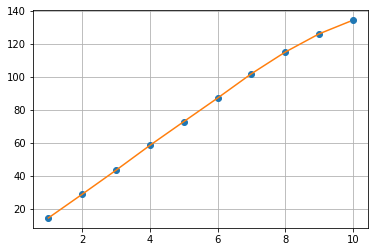

In [76]:
# Interpolation of the contribution.

    # Ask for what I have to do here now.

interpolation_val = []
x = np.arange(1, 11)
for i in range(1, 11):
    interpolation_val.append(np.mean(games['e'+str(i)]))
interpolation_val = np.asarray(interpolation_val)
f = sp.interpolate.interp1d(x, interpolation_val)

xnew = np.arange(1, 10, 0.1)
ynew = f(xnew)
plt.plot(x, interpolation_val, 'o', xnew, ynew, '-')
plt.grid()
plt.show()

In [77]:
ynew

array([ 14.57142857,  16.00952381,  17.44761905,  18.88571429,
        20.32380952,  21.76190476,  23.2       ,  24.63809524,
        26.07619048,  27.51428571,  28.95238095,  30.40952381,
        31.86666667,  33.32380952,  34.78095238,  36.23809524,
        37.6952381 ,  39.15238095,  40.60952381,  42.06666667,
        43.52380952,  45.02857143,  46.53333333,  48.03809524,
        49.54285714,  51.04761905,  52.55238095,  54.05714286,
        55.56190476,  57.06666667,  58.57142857,  60.00952381,
        61.44761905,  62.88571429,  64.32380952,  65.76190476,
        67.2       ,  68.63809524,  70.07619048,  71.51428571,
        72.95238095,  74.38095238,  75.80952381,  77.23809524,
        78.66666667,  80.0952381 ,  81.52380952,  82.95238095,
        84.38095238,  85.80952381,  87.23809524,  88.71428571,
        90.19047619,  91.66666667,  93.14285714,  94.61904762,
        96.0952381 ,  97.57142857,  99.04761905, 100.52380952,
       102.        , 103.31428571, 104.62857143, 105.94

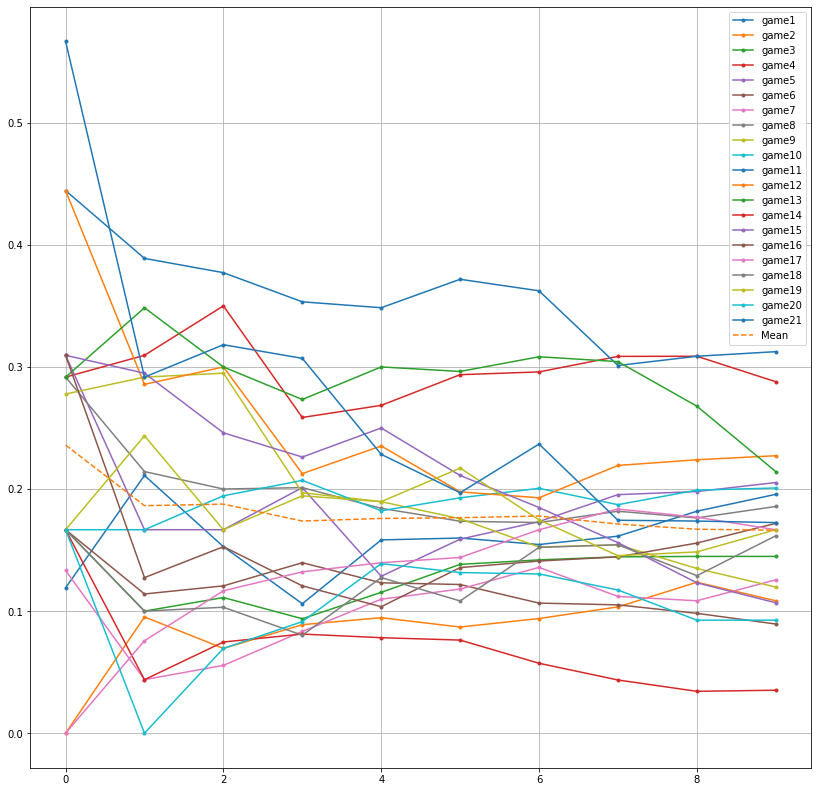

In [78]:
# Gini Index

mean_gini = []
for j in range(0, 10):
    mean_gini.append(np.mean([(i[0]) for i in pd.DataFrame(data=gini_dict).iloc[j]]))

plt.figure(figsize=(14,14))
for i in range(1, 22):
    plt.plot(gini_dict['game'+str(i)], label='game'+str(i), marker=".")
    
plt.plot(mean_gini, ls='--', label="Mean")
plt.grid()
plt.legend(loc=1)

plt.savefig('gini_aigua')

In the figure above we can see a pretty interesting move.


If you look at the mean (the dashed line) you can see how the inequalty at the start it's randomly distributed. But then it stabilizes. So each person has a sensation of the amount they contributed and they act in order to reduce this desequal aportation originated by the random distribution at the start. And then this disequalty stabilizes. Meaning your first moves will probably determine the conduct of the other players and talk about how you're ending.

## Viladecans

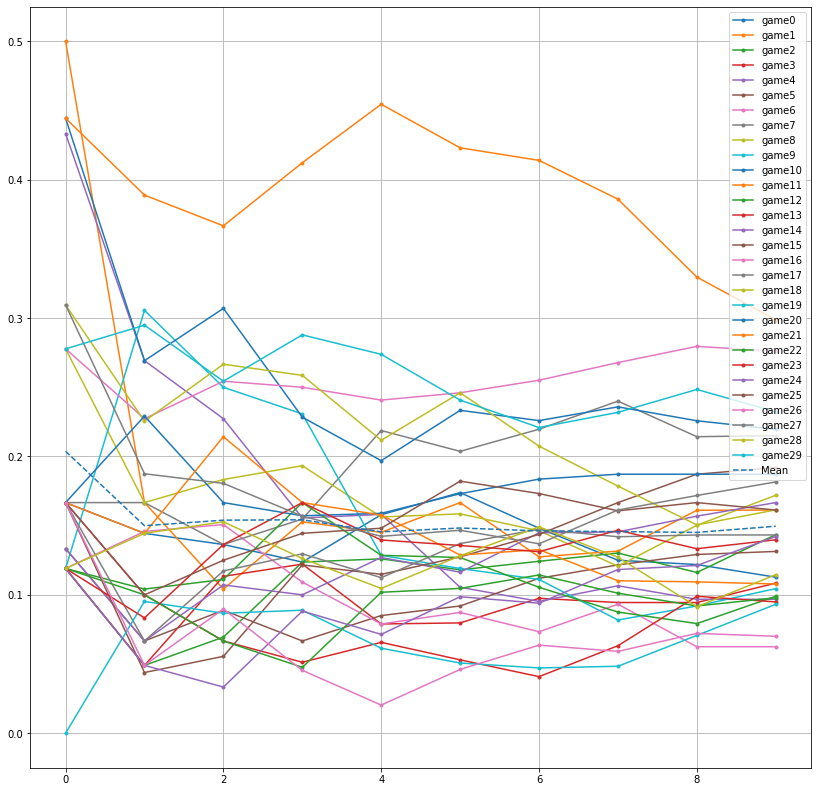

In [79]:
mean_gini = []
for j in range(0, 10):
    mean_gini.append(np.mean([(i[0]) for i in pd.DataFrame(data=gini_dict_v).iloc[j]]))

plt.figure(figsize=(14,14))
for i in range(0, 30):
    plt.plot(gini_dict_v['game'+str(i)], label='game'+str(i), marker=".")
    
plt.plot(mean_gini, ls='--', label="Mean")
plt.grid()
plt.legend(loc=1)
plt.show()

## Clima

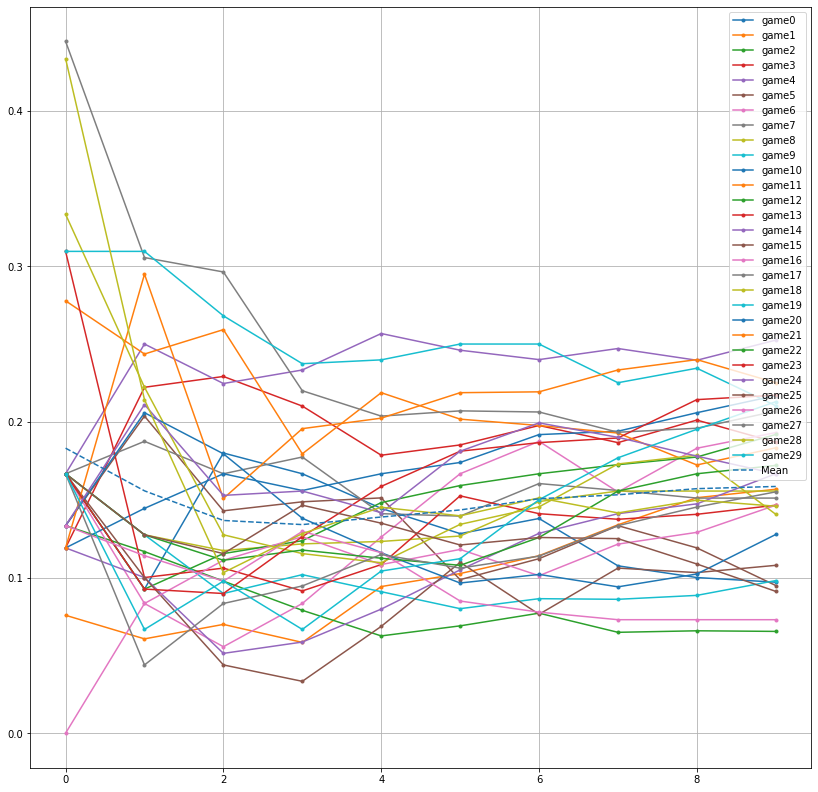

In [80]:
# Gini Index

mean_gini = []
for j in range(0, 10):
    mean_gini.append(np.mean([(i[0]) for i in pd.DataFrame(data=gini_dict_c).iloc[j]]))

plt.figure(figsize=(14,14))
for i in range(0, 30):
    plt.plot(gini_dict_c['game'+str(i)], label='game'+str(i), marker=".")
    
plt.plot(mean_gini, ls='--', label="Mean")
plt.grid()
plt.legend(loc=1)
plt.show()

# Starting With Strategies.

We are doing a study of a strategy using Markov's Chains where we only measure the tendence of the addition. The length of each chain will be 2. The idea behind this is to see if the amount of contribution per human is randomly distributed or not.

0 -> No variation

1 -> +2 Variation

2 -> -2 Variation

3 -> +4 Variation

4 -> -4 Variation

_Building the markov chains:_

In [81]:
markov_aigua = {}

for i in range(0, 134):
    try:

        user = user_evo_aigua[user_evo_aigua['user_id'] == i]
        chain_markov = []
        for j in range(1, 10):
            var = int(user['C'+ str(j + 1)]) - int(user['C'+ str(j)])
            if (var == 0):
                chain_markov.append(0)
            elif (var == 2):
                chain_markov.append(1)
            elif (var == -2):
                chain_markov.append(2)
            elif (var == 4):
                chain_markov.append(3)
            else:
                chain_markov.append(4)
        chain_markov.append(int(user['game_id']))
        markov_aigua['user%s' % i] = chain_markov
    except:
        pass
markov_aigua = pd.DataFrame.from_dict(markov_aigua, columns=['m1','m2','m3','m4','m5','m6','m7','m8','m9','game_id'], orient='index')

In [82]:
# We are doing the markov structure for the different datasets.

markov_clima = {}
i = 0 
for index, user in user_evo_clima.iterrows():
    try:
        chain_markov = []
        for j in range(1, 10):
            var = int(user['c'+ str(j + 1)]) - int(user['c'+ str(j)])
            if (var == 0):
                chain_markov.append(0)
            elif (var == 2):
                chain_markov.append(1)
            elif (var == -2):
                chain_markov.append(2)
            elif (var == 4):
                chain_markov.append(3)
            else:
                chain_markov.append(4)
        # Adding a * 10 to the game_id in order to avoid future bugs.
        chain_markov.append(int(user['game_id'])*10)
        markov_clima['user%s' % i] = chain_markov
        i += 1
    except:
        pass
markov_clima = pd.DataFrame.from_dict(markov_clima, columns=['m1','m2','m3','m4','m5','m6','m7','m8','m9','game_id'], orient='index')

In [83]:
# We are doing the markov structure for the different datasets.

markov_vila = {}
i = 0 
for index, user in user_evo.iterrows():
    try:
        chain_markov = []
        for j in range(1, 10):
            var = int(user['c'+ str(j + 1)]) - int(user['c'+ str(j)])
            if (var == 0):
                chain_markov.append(0)
            elif (var == 2):
                chain_markov.append(1)
            elif (var == -2):
                chain_markov.append(2)
            elif (var == 4):
                chain_markov.append(3)
            else:
                chain_markov.append(4)
         # Adding a * 100 to the game_id in order to avoid future bugs.
        chain_markov.append(int(user['group_id'])*100)
        markov_vila['user%s' % i] = chain_markov
        i += 1
    except:
        pass
markov_vila = pd.DataFrame.from_dict(markov_vila, columns=['m1','m2','m3','m4','m5','m6','m7','m8','m9','game_id'], orient='index')

_Computing the simple probabilities:_

_For raw values:_

In [84]:
# We should define each value of probability and start using the algorithms.
matrix_raw_aigua = np.zeros(shape=(3, 10))
for i in range(0,10):
    round_markov = np.asarray(user_evo_aigua['c'+str(i+1)])
    for j in range(0, 3):
        count = 0
        for num in round_markov:
            if (j*2) == num:
                count += 1
        matrix_raw_aigua[j, i] = count/len(round_markov)

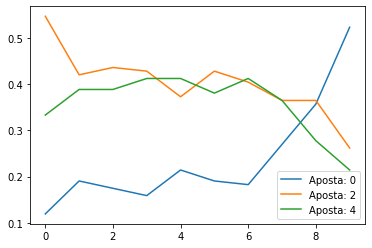

In [85]:
plt.plot(matrix_raw_aigua[0], label="Aposta: 0")
plt.plot(matrix_raw_aigua[1], label="Aposta: 2")
plt.plot(matrix_raw_aigua[2], label="Aposta: 4")

plt.legend()

In [86]:
# We should define each value of probability and start using the algorithms.
matrix_raw_vila = np.zeros(shape=(3, 10))
for i in range(0,10):
    round_markov = np.asarray(user_evo['c'+str(i+1)])
    for j in range(0, 3):
        count = 0
        for num in round_markov:
            if (j*2) == num:
                count += 1
        matrix_raw_vila[j, i] = count/len(round_markov)

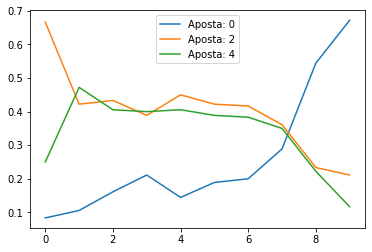

In [87]:
plt.plot(matrix_raw_vila[0], label="Aposta: 0")
plt.plot(matrix_raw_vila[1], label="Aposta: 2")
plt.plot(matrix_raw_vila[2], label="Aposta: 4")

plt.legend()

In [88]:
# We should define each value of probability and start using the algorithms.
matrix_raw_clima = np.zeros(shape=(3, 10))
for i in range(0,10):
    round_markov = np.asarray(user_evo_clima['c'+str(i+1)])
    for j in range(0, 3):
        count = 0
        for num in round_markov:
            if (j*2) == num:
                count += 1
        matrix_raw_clima[j, i] = count/len(round_markov)

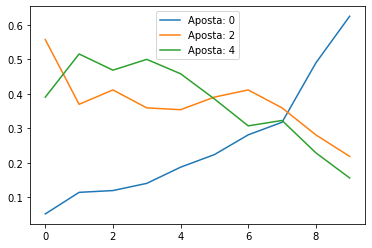

In [89]:
plt.plot(matrix_raw_clima[0], label="Aposta: 0")
plt.plot(matrix_raw_clima[1], label="Aposta: 2")
plt.plot(matrix_raw_clima[2], label="Aposta: 4")

plt.legend()

_For Markov Chains:_

In [90]:
# We should define each value of probability and start using the algorithms.
matrix_vila = np.zeros(shape=(5, 9))
for i in range(0,9):
    round_markov = np.asarray(markov_vila['m'+str(i+1)])
    for j in range(0, 5):
        count = 0
        for num in round_markov:
            if j == num:
                count += 1
        matrix_aigua[j, i] = count/len(round_markov)

NameError: name 'matrix_aigua' is not defined

In [91]:
plt.plot(matrix_aigua[0], label="Var: 0")
plt.plot(matrix_aigua[1], label="Var: +2")
plt.plot(matrix_aigua[2], label="Var: -2")
plt.plot(matrix_aigua[3], label="Var: +4")
plt.plot(matrix_aigua[4], label="Var: -4")


plt.legend()

NameError: name 'matrix_aigua' is not defined

In [92]:
# The matrix contains all the probabilities for all the rounds.
matrix_vila = np.zeros(shape=(5, 9))
for i in range(0,9):
    round_makarov = np.asarray(markov_vila['m'+str(i+1)])
    for j in range(0, 5):
        count = 0
        for num in round_makarov:
            if j == num:
                count += 1
        matrix_vila[j, i] = count/len(round_makarov)

In [93]:
matrix_clima = np.zeros(shape=(5, 9))
for i in range(0,9):
    round_markov = np.asarray(markov_clima['m'+str(i+1)])
    for j in range(0, 5):
        count = 0
        for num in round_markov:
            if j == num:
                count += 1
        matrix_clima[j, i] = count/len(round_markov)

## Symbolic Mutual Information (SMI)

We are calculating this using the following expresion and in two different ways. One using Markov chains and the other one using the raw values.

$ I(\hat{X},\hat{Y}) = \sum\limits_{\hat{y}}\sum\limits_{\hat{x}} p(\hat{x}_t,\hat{y}_t)log_m\frac{p(\hat{x}_t,\hat{y}_t)}{p(\hat{x}_t)p(\hat{y}_t)}$

Aquí trobem un gran dilema. I és: com calculem la probabilitat? I la condicionada? La probabilitat és la tendència particular de tirar un cert nombre o la tendència general compartint un espai de temps?

Si es de la primera hem de comparar dos jugadors de manera conjunta i totes les vegades que hagin tirat cada numero. Un cop fet això examinarne els valors obtinguts. A aquesta manera de calcular la matriu de Informació Mutua li direm horitzontal.
Si es la segona la probabilitat condicionada ha de tenir en compte en aquell moment de temps tots els valors i les seves parelles. Un inconvenient d'això és que perdem la informació compartida entre dos persones durant tot el temps però tenim amb més precisió la d'aquell instant. L'anomenarem vertical. Cal veure que la vertical proporciona poca informació ja que el nombre de parelles que es poden generar és gairebé igual al nombre de valors sols d'una. Per tant la probabilitat condicionada no ho és tant. El que determina que la MI sigui 0.

Tenim aquí un trade-off entre precisió temporal i interpersonal.

### Measuring value by value. 

#### Horitzontal:

In [94]:
# AQUEST NO VALE BROS.

smi_ver_vila = np.zeros(shape=(181,181))
for index_1, user_1 in user_evo.iterrows():
    for index_2, user_2 in user_evo.iterrows():
        

        index_1 = contributions_separation(str(index_1))[0]
        index_2 = contributions_separation(str(index_2))[0]
                
        x_array = np.asarray(user_1[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']])
        y_array = np.asarray(user_2[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']])
        mi = 0
        for index, num in enumerate(x_array):
            # Pair of Study Catched
            pair = [num, y_array[index]]
            
            # Separate Probabilities (this may suffer variations):

            
            px = matrix_raw_vila[int(num//2), index]
            py = matrix_raw_vila[int(y_array[index]//2), index]
            

            
            # Condicionated Probability:
            # It looks that what we have here works. 
            pos_x = []
            for index_x, num_x in enumerate(x_array):
                
                if num == num_x:
                    pos_x.append(index_x)
            cont_y = 0
            for pos in pos_x:
                if y_array[index] == y_array[pos]:
                    cont_y += 1
            
            if len(pos_x) != 0:
                p_x_given_y = cont_y/len(pos_x)
                if p_x_given_y != 0 and px*py != 0:
                    # Check the px and the py stuff
                    mi = mi + (p_x_given_y*py*math.log(p_x_given_y*py/(px*py),3))
                else:
                    mi = None
                           
            else:
                p_x_given_y = None
                mi = None
                # You have to think here where to put x or y. It depends on the way that p_x_given_y is descripted.
                
    # YOU HAVE TO FINISH THIS
        if mi != None:
            smi_ver_vila[index_1, index_2] = mi/10
        else:
            smi_ver_vila[index_1, index_2] = 0

0.2952862107675104

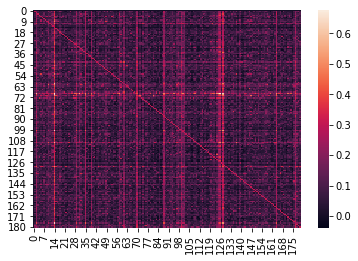

In [95]:
# What we do have here looks wrong.
sns.heatmap(smi_ver_vila)

smi_ver_vila[1,1]

#### Different way to compute the probabilities.

In [157]:
smi_ver_vila = np.zeros(shape=(181,181))
for index_1, user_1 in user_evo.iterrows():
    for index_2, user_2 in user_evo.iterrows():
        

        index_1 = contributions_separation(str(index_1))[0]
        index_2 = contributions_separation(str(index_2))[0]
                
        x_array = np.asarray(user_1[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']])
        y_array = np.asarray(user_2[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']])

        
        y_prob = []  
        cont_0y = 0
        cont_2y = 0
        cont_4y = 0
        
        x_prob = []
        cont_0 = 0
        cont_2 = 0
        cont_4 = 0
        
        # Y PROBABILITIES
        for index, num in enumerate(y_array):
            # Pair of Study Catched

            
            # Separate Probabilities:

            
            if num == 0:
                cont_0y += 1
            elif num == 2:
                cont_2y += 1
            else:
                cont_4y += 1
        y_prob.append(cont_0y/10)
        y_prob.append(cont_2y/10)
        y_prob.append(cont_4y/10)
        
            
            
        
        # X PROBABILITIES
        for index, num in enumerate(x_array):
            # Pair of Study Catched
            pair = [num, y_array[index]]
            
            # Separate Probabilities:

            
            if num == 0:
                cont_0 += 1
            elif num == 2:
                cont_2 += 1
            else:
                cont_4 += 1
        x_prob.append(cont_0/10)
        x_prob.append(cont_2/10)
        x_prob.append(cont_4/10)
           
            
        # CONDITIONATED PROBABILITY AND MUTUAL INFORMATION    
        mi = 0        # INITIATING THE MUTUAL INFORMATION FOR EACH VALUE
        for index, num in enumerate(x_array):
            # PROBABILITIES
            px = x_prob[int(num)//2]
            py = y_prob[int(y_array[index])//2]



            # Condicionated Probability:
            # It looks that what we have here works. 
            pos_x = []
            for index_x, num_x in enumerate(x_array):
                
                if num == num_x:
                    pos_x.append(index_x)
            cont_y = 0
            for pos in pos_x:
                if y_array[index] == y_array[pos]:
                    cont_y += 1
            
            p_x_given_y = cont_y/len(pos_x)

            mi = mi + (p_x_given_y*px*math.log(p_x_given_y*px/(px*py),3))

        if mi != None:
            smi_ver_vila[index_1, index_2] = mi/10
        else:
            smi_ver_vila[index_1, index_2] = 0

In [158]:
x_array = [2.0, 0.0, 2.0, 4.0, 2.0, 0.0, 4.0, 2.0, 0.0, 0.0]
y_array = [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 0.0]
y_array = x_array
        
y_prob = []  # DEBUGGING HERE. YOU ALMOST HAVE IT.
cont_0y = 0
cont_2y = 0
cont_4y = 0
        
x_prob = []
cont_0 = 0
cont_2 = 0
cont_4 = 0
for num in (y_array):
    

            
    # Separate Probabilities:

            
    if num == 0:
        cont_0y += 1
    elif num == 2:
        cont_2y += 1
    else:
        cont_4y += 1
y_prob.append(cont_0y/10)
y_prob.append(cont_2y/10)
y_prob.append(cont_4y/10)

# py = y_prob[int(num)//2] # Aqui sempre em pillara el ultim valor. perque això no està dins de cap bucle.

# print(y_prob) les probabilitats de y estan bé
            
mi = 0
for index, num in enumerate(x_array):
    # Pair of Study Catched
            
            # Separate Probabilities:

            
    if num == 0:
        cont_0 += 1
    elif num == 2:
        cont_2 += 1
    else:
        cont_4 += 1
x_prob.append(cont_0/10)
x_prob.append(cont_2/10)
x_prob.append(cont_4/10)
    
for index, num in enumerate(x_array):
    px = x_prob[int(num)//2]
    py = y_prob[int(y_array[index])//2]

    print(x_prob)
    # print(py) # Solved problem above
            # Condicionated Probability:
        # We should now see how we are calculating the conidionated probability. START FROM HERE
    pos_x = []
    for index_x, num_x in enumerate(x_array):
                
        if num == num_x:
            pos_x.append(index_x)
    cont_y = 0
    for pos in pos_x:
        if y_array[index] == y_array[pos]:
            cont_y += 1
            
#    if len(pos_x) != 0:
    p_x_given_y = cont_y/len(pos_x)
#        if px*py != 0:
                    # Check the px and the py stuff
    mi = mi + (p_x_given_y*px*math.log(p_x_given_y*px/(px*py),3))
#        else:
#            mi = mi + 0
                           
#    else:
#        p_x_given_y = None
#        mi = mi + 0
print(mi)

[0.4, 0.4, 0.2]
[0.4, 0.4, 0.2]
[0.4, 0.4, 0.2]
[0.4, 0.4, 0.2]
[0.4, 0.4, 0.2]
[0.4, 0.4, 0.2]
[0.4, 0.4, 0.2]
[0.4, 0.4, 0.2]
[0.4, 0.4, 0.2]
[0.4, 0.4, 0.2]
3.2549294631558734


<AxesSubplot:>

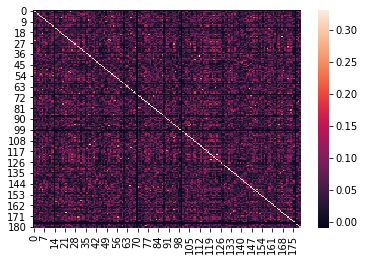

In [159]:
sns.heatmap(smi_ver_vila)

In [160]:
# THE ULTIMATE MUTUAL INFOMRATION (FOR 3 VALUES) FUNCTION.

def mutual_information(dataframe):
    side = dataframe.count()['c1'] + 1
    i = 0
    smi_ver_vila = np.zeros(shape=(side,side))
    for index_1, user_1 in dataframe.iterrows():
        i += 1
        j = 0
        for index_2, user_2 in dataframe.iterrows():
            j += 1
            index_1 = contributions_separation(str(index_1))[0]
            index_2 = contributions_separation(str(index_2))[0]
            x_array = np.asarray(user_1[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']])
            y_array = np.asarray(user_2[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']])


            y_prob = []  
            cont_0y = 0
            cont_2y = 0
            cont_4y = 0

            x_prob = []
            cont_0 = 0
            cont_2 = 0
            cont_4 = 0

            # Y PROBABILITIES
            for index, num in enumerate(y_array):
                # Pair of Study Catched


                # Separate Probabilities:


                if num == 0:
                    cont_0y += 1
                elif num == 2:
                    cont_2y += 1
                else:
                    cont_4y += 1
            y_prob.append(cont_0y/10)
            y_prob.append(cont_2y/10)
            y_prob.append(cont_4y/10)




            # X PROBABILITIES
            for index, num in enumerate(x_array):
                # Pair of Study Catched
                pair = [num, y_array[index]]

                # Separate Probabilities:


                if num == 0:
                    cont_0 += 1
                elif num == 2:
                    cont_2 += 1
                else:
                    cont_4 += 1
            x_prob.append(cont_0/10)
            x_prob.append(cont_2/10)
            x_prob.append(cont_4/10)


            # CONDITIONATED PROBABILITY AND MUTUAL INFORMATION    
            mi = 0        # INITIATING THE MUTUAL INFORMATION FOR EACH VALUE
            for index, num in enumerate(x_array):
                # PROBABILITIES
                px = x_prob[int(num)//2]
                py = y_prob[int(y_array[index])//2]



                # Condicionated Probability:
                # It looks that what we have here works. 
                pos_x = []
                for index_x, num_x in enumerate(x_array):

                    if num == num_x:
                        pos_x.append(index_x)
                cont_y = 0
                for pos in pos_x:
                    if y_array[index] == y_array[pos]:
                        cont_y += 1

                p_x_given_y = cont_y/len(pos_x)

                mi = mi + (p_x_given_y*px*math.log(p_x_given_y*px/(px*py),3))

            if mi != None:
                smi_ver_vila[i, j] = mi/10
            else:
                smi_ver_vila[i, j] = 0
    return smi_ver_vila

In [161]:
mi_clima = mutual_information(user_evo_clima)
user_evo_clima.head(-5)

c1  c2  c3  c4  c5  c6  c7  c8  c9  c10  ...    mean_e7  min_e8  \
user1     2   2   0   2   2   4   0   4   0    0  ...  19.333333      16   
user2     4   2   4   4   4   2   4   2   0    0  ...  19.333333      16   
user3     4   4   4   4   4   4   2   0   0    0  ...  19.333333      16   
user4     4   2   2   4   4   0   0   0   2    0  ...  19.333333      16   
user5     2   4   0   2   4   2   4   2   4    2  ...  19.333333      16   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...        ...     ...   
user201   4   4   4   4   4   4   4   4   0    0  ...  18.333333       4   
user202   2   4   4   2   0   2   2   0   2    0  ...  18.333333       4   
user203   4   4   4   2   2   2   4   0   2    0  ...  18.333333       4   
user204   0   0   2   0   2   0   0   0   2    0  ...  18.333333       4   
user205   2   4   4   2   2   4   4   0   0    0  ...  21.000000      14   

         max_e8    mean_e8  min_e9  max_e9    mean_e9  min_e10  max_e10  \
user1        26  20.666667      16      26  21.666667       16       26   
user2        26  20.666667      16      26  21.666667       16       26   
user3        26  20.666667      16      26  21.666667       16       26   
user4        26  20.666667      16      26  21.666667       16       26   
user5        26  20.666667      16      26  21.666667       16       26   
...         ...        ...     ...     ...        ...      ...      ...   
user201      32  19.000000       6      32  20.333333        6       32   
user202      32  19.000000       6      32  20.333333        6       32   
user203      32  19.000000       6      32  20.333333        6       32   
user204      32  19.000000       6      32  20.333333        6       32   
user205      28  21.000000      14      30  21.333333       14       30   

          mean_e10  
user1    22.333333  
user2    22.333333  
user3    22.333333  
user4    22.333333  
user5    22.333333  
...            ...  
user201  20.333333  
user202  20.333333  
user203  20.333333  
user204  20.333333  
user205  21.333333  

[187 rows x 51 columns]

<AxesSubplot:>

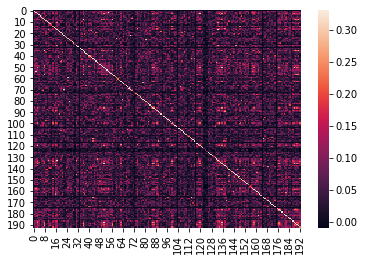

In [162]:
sns.heatmap(mi_clima)

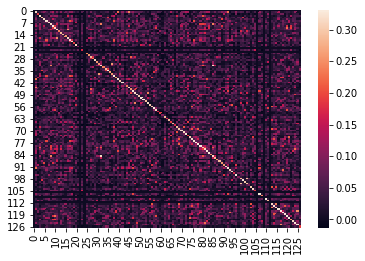

In [163]:
mi_aigua = mutual_information(user_evo_aigua)
sns.heatmap(mi_aigua)

plt.savefig('heatmap_aigua_dirty')

## Mask on the mutual information matrix.

We are building a mask based on the shuffling each array.

In [164]:
from sklearn.utils import shuffle

In [165]:
# THE ULTIMATE MUTUAL INFOMRATION (FOR 3 VALUES) FUNCTION.

def mutual_information_shuffled(dataframe):
    side = dataframe.count()['c1'] + 1
    i = 0
    smi_ver_vila = np.zeros(shape=(side,side))
    for index_1, user_1 in dataframe.iterrows():
        i += 1
        j = 0
        for index_2, user_2 in dataframe.iterrows():
            j += 1
            index_1 = contributions_separation(str(index_1))[0]
            index_2 = contributions_separation(str(index_2))[0]
            x_array = shuffle(np.asarray(user_1[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']]))
            y_array = shuffle(np.asarray(user_2[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']]))


            y_prob = []  
            cont_0y = 0
            cont_2y = 0
            cont_4y = 0

            x_prob = []
            cont_0 = 0
            cont_2 = 0
            cont_4 = 0

            # Y PROBABILITIES
            for index, num in enumerate(y_array):
                # Pair of Study Catched


                # Separate Probabilities:


                if num == 0:
                    cont_0y += 1
                elif num == 2:
                    cont_2y += 1
                else:
                    cont_4y += 1
            y_prob.append(cont_0y/10)
            y_prob.append(cont_2y/10)
            y_prob.append(cont_4y/10)




            # X PROBABILITIES
            for index, num in enumerate(x_array):
                # Pair of Study Catched
                pair = [num, y_array[index]]

                # Separate Probabilities:


                if num == 0:
                    cont_0 += 1
                elif num == 2:
                    cont_2 += 1
                else:
                    cont_4 += 1
            x_prob.append(cont_0/10)
            x_prob.append(cont_2/10)
            x_prob.append(cont_4/10)


            # CONDITIONATED PROBABILITY AND MUTUAL INFORMATION    
            mi = 0        # INITIATING THE MUTUAL INFORMATION FOR EACH VALUE
            for index, num in enumerate(x_array):
                # PROBABILITIES
                px = x_prob[int(num)//2]
                py = y_prob[int(y_array[index])//2]



                # Condicionated Probability:
                # It looks that what we have here works. 
                pos_x = []
                for index_x, num_x in enumerate(x_array):

                    if num == num_x:
                        pos_x.append(index_x)
                cont_y = 0
                for pos in pos_x:
                    if y_array[index] == y_array[pos]:
                        cont_y += 1

                p_x_given_y = cont_y/len(pos_x)

                mi = mi + (p_x_given_y*px*math.log(p_x_given_y*px/(px*py),3))

            if mi != None:
                smi_ver_vila[i, j] = mi/10
            else:
                smi_ver_vila[i, j] = 0
    return smi_ver_vila

In [166]:
mi_clima_shuffled = mutual_information_shuffled(user_evo_clima)

In [167]:
def mi_masked(natural, shuffled):
    mask = np.zeros(natural.shape)
    
    for i in range(0, natural.shape[0]):
        for j in range(0, natural.shape[1]):
            if((natural[i,j]-shuffled[i,j]) > 0):
                mask[i, j] = 1
    return mask*natural       

193


<AxesSubplot:>

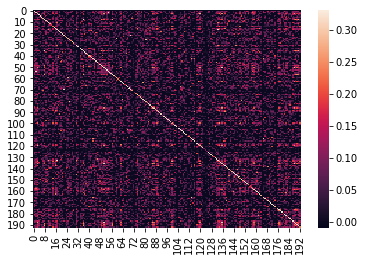

In [168]:
mi_def = mi_masked(mi_clima, mi_clima_shuffled)
print(len(mi_clima[:]))
sns.heatmap(mi_def)

127


<AxesSubplot:>

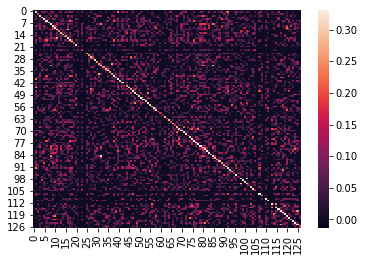

In [169]:
mi_aigua_shuffled = mutual_information_shuffled(user_evo_aigua)

mi_aigua_def = mi_masked(mi_aigua, mi_aigua_shuffled)
print(len(mi_aigua[:]))
sns.heatmap(mi_aigua_def)

In [170]:
mi_vila = mutual_information(user_evo)

mi_vila_shuffled = mutual_information_shuffled(user_evo)

mi_vila_def = mi_masked(smi_ver_vila, mi_vila_shuffled)

sns.heatmap(mi_vila_def)

IndexError: index 180 is out of bounds for axis 1 with size 180

In [ ]:
sum(sum(mi_vila_def))/sum(sum(mi_vila))

In [ ]:
sum(sum(mi_def))/sum(sum(mi_clima))

In [ ]:
sum(sum(mi_aigua_def))/sum(sum(mi_aigua))

### MI of all the players directly

In [ ]:
raw_evo_vila = user_evo[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10','e1', 'e2', 'e3','e4', 'e5', 'e6','e7', 'e8', 'e9', 'e10']]
raw_evo_clima = user_evo_clima[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10','e1', 'e2', 'e3','e4', 'e5', 'e6','e7', 'e8', 'e9', 'e10']]
raw_evo_aigua = user_evo_aigua[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10','e1', 'e2', 'e3','e4', 'e5', 'e6','e7', 'e8', 'e9', 'e10']]

frames = [raw_evo_vila, raw_evo_aigua, raw_evo_clima]

total_evo = pd.concat(frames)

In [ ]:
total_evo = total_evo.reset_index()

In [ ]:
mi_total = mutual_information(total_evo)
mi_total_shuffled = mutual_information_shuffled(total_evo)

mi_total_def = mi_masked(mi_total, mi_total_shuffled)

In [ ]:
sns.heatmap(mi_total_def)

plt.hlines(179, 0, 499, colors='red')
plt.hlines(306, 0, 499, colors='red')

plt.vlines(179, 0, 499, colors='red')
plt.vlines(306, 0, 499, colors='red')

plt.savefig('heatmap_mi')

Normalizing the matrix above.

In [ ]:
np.max(mi_total_def)
mi_total_def_norm = mi_total_def/np.max(mi_total_def)

sns.heatmap(mi_total_def_norm)

plt.hlines(179, 0, 499, colors='red')
plt.hlines(306, 0, 499, colors='red')

plt.vlines(179, 0, 499, colors='red')
plt.vlines(306, 0, 499, colors='red')

plt.savefig('heatmap_mi_norm')

In [ ]:
sns.heatmap(mi_total_def)

In [ ]:
np.mean(np.mean(mi_total_def, axis=1))

## Network Representation

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [121]:
dicti = {}
for i in range(len(mi_total_def_norm)):
    dicti['user%s' % i] = mi_total_def_norm[:,i]
               
df = pd.DataFrame(dicti)

In [122]:
new_index = []
for i in range(0,499):
    new_index.append('user'+str(i))


In [123]:
# Amb el paquet de Networkx creem el la xarxa (el graph) utilitzant la matriu de correlació. El que et torna aquesta funció
# és els links (edges) entre usuaris (nodes) pesats amb el valor corresponent de la correlation matrix. 
# Per exemple, la correlació entre l'usuari 1, i l'usuari 2 és 0.89, per tant es crea un link entre els usuaris 1 i 2 amb un 
# weight (pes) de 0.89.
G = nx.from_numpy_matrix(mi_total_def_norm)

# Utilitzem els noms dels usuaris que hem guardat anteriorment per re-escriure els noms dels Nodes de la xarxa, d'aquesta
# manera tenim identificats els usuaris en el gràfic (per defecte assignaria les etiquetes 0, 1, 2... als nodes).
# G = nx.relabel_nodes(G,lambda x: usuaris[x])

print(G.edges(data=True)) # Amb aquesta funció printem els links (edges) amb els seus respectius pesos.
print('')
print(G.nodes()) # Amb aquesta funció printem els nodes de la xarxa.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [124]:
# Funció per crear i representar gràficament xarxes a partir de la matriu de correlació. 



def create_corr_network(G, corr_direction,min_correlation):
    
    # Creem una còpia de la xarxa G que anomenarem H.
    H = G.copy()
                        
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)     
        
        
    # Creem dos llistes, una amb els links i l'altre amb els seus pesos (valos de la correlació).
    edges, weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    # Com que volem pintar el gruix dels links en funció del valor del pes, i en general tenim valors petits (entre -1 i 1),
    # rescalem els valors simplement per fer-los més grans i que es veiguin millor els links gràficament.
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    
    # Creem dos llistes, una amb els valors del "degree" de cada node, com em dit, es el nombre de links que té cada node i una
    # altre amb els noms dels nodes (usuari 1, usuari2,...)
    node_sizes = [val for (node, val) in H.degree()]
    nodelist = [node for (node, val) in H.degree()]
    
    # Les posicions de cada node en el gràfic.
    positions=nx.circular_layout(H)
    
    # Creem la figura
    plt.figure(figsize=(15,15))

    # Dibuixem els nodes del gràfic H, amb les posicions i un color i assignant els noms dels nodes de la nodelist.
    # El que fem, és també pintar la grandària del node segons el degree. És a dir, si un node té molts links que el relacionen
    # amb altres nodes (alt degree), pintarem aquell node més gran. En el nostre cas, tots els nodes tenen el mateix degree i
    # per tant la mateixa grandaria (el x**3 és per rescalar i que surti el tamany més gran, per res mes).
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    # Escribim amb lletra el nom dels nodes en cada posició
    # nx.draw_networkx_labels(H, positions, font_size=20, font_family='sans-serif')
    
    # Ara pintem els colors dels links basats en si la correlació (pes) es positiva o negativa, per diferenciar. 
    if corr_direction == "positive":
        edge_colour = plt.cm.Greens   # Assigem escala de verds per els valors positius
    else:
        edge_colour = plt.cm.Reds   # Assigem escala de vermells per els valors negatius
        
    # Ara pintem els links (edges) entre cada node de la xarxa H. Agafem les posicions dels nodes i la llista de links
    # Agafem width=weights i edge_color=weights així el gruixit i el color dels links està basat en el pes (correlació)
    # el valor de edge_cmap és per assignar l'escala de colors basada en els pesos.
    # edge_vmin and edge_vmax assignen els valors min i max dels weights pel gruix
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # Treiem els eixos de coordenades
    plt.axis('off')
    
    # guardar la image
    plt.savefig("xxnn" + corr_direction + ".png", format="PNG")
    
    # plotar
    plt.show() 

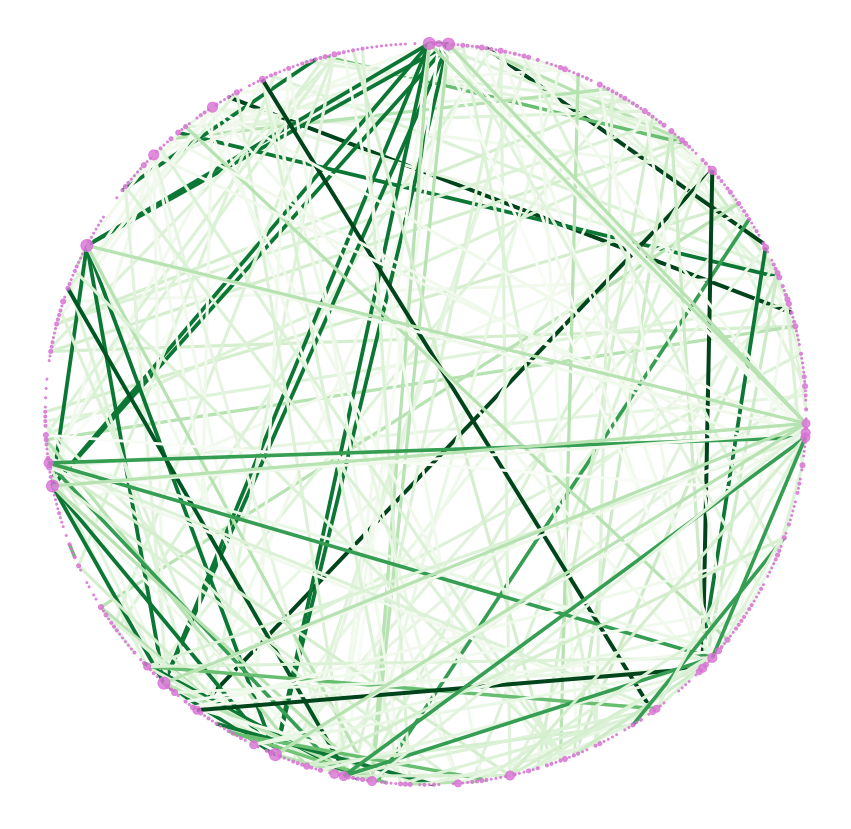

In [125]:
create_corr_network(G, corr_direction='positive',min_correlation=0.7)

## Clustering using the Mutual Information Matrix.

In [ ]:
from sklearn.cluster import KMeans

### Elbow Method.

In [139]:
def cluster_elbow(df):
    sse = []
    for i in range(1, 40):
        kmeans = KMeans(n_clusters=i).fit(df)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(df)
        curr_sse = 0

        for i in range(len(df)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (df[i,0] - curr_center[0])**2 + (df[i,1] - curr_center[1])**2


        sse.append(curr_sse)
        
    return sse

In [140]:
elbow_sc = cluster_elbow(mi_total_def_norm)

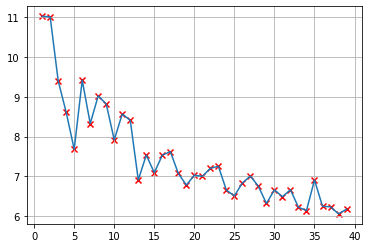

In [141]:
plt.plot(np.arange(1, 40), elbow_sc)
plt.scatter(np.arange(1, 40), elbow_sc, c='r', marker='x')

plt.grid('on')
plt.savefig('elbow')

In [142]:
from sklearn.metrics import silhouette_score
def cluster_sil(df):
    sil = []
    kmax = 40

    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    for k in range(2, kmax+1):
      kmeans = KMeans(n_clusters = k).fit(df)
      labels = kmeans.labels_
      sil.append(silhouette_score(df, labels, metric = 'euclidean'))
    return sil

In [143]:
sil_score = cluster_sil(mi_total_def_norm)

# plt.grid('on')

# plt.savefig('silhouette')

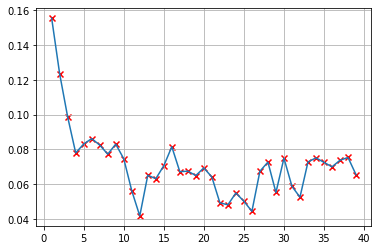

In [144]:
plt.plot(np.arange(1,40), sil_score)
plt.scatter(np.arange(1,40), sil_score, c='red', marker='x')

plt.grid('on')
plt.savefig('silhouette')

In [ ]:
kmeans = KMeans(n_clusters=8).fit(mi_total_def_norm)
labels = kmeans.labels_

len(labels)

### Clustering Groups of persons.

In [ ]:
user_vila.head()

In [ ]:
user_treated = user_vila[['genere', 'rang_edat', 'nivell_estudis']]

user_treated[['gender', 'age', 'education']] = user_treated[['genere', 'rang_edat', 'nivell_estudis']]

user_treated.drop('genere', axis=1, inplace=True)
user_treated.drop('rang_edat', axis=1, inplace=True)
user_treated.drop('nivell_estudis', axis=1, inplace=True)




user_treated.head()

In [ ]:
participants.head()

In [ ]:
participants_treated = participants[['gender', 'age', 'education']]

In [ ]:
user_cccb = pd.read_excel('../../TfG/Data/Clima/user_CCCB_excel.xlsx', header=1)

In [ ]:
user_cccb.head()

In [ ]:
user_cccb_treated = user_cccb[['gender', 'age_range', 'educational_level']]

user_cccb_treated[['age', 'education']] = user_cccb_treated[['age_range', 'educational_level']]

user_cccb_treated.drop('age_range', axis=1, inplace=True)
user_cccb_treated.drop('educational_level', axis=1, inplace=True)




In [ ]:
frames = [user_treated, participants_treated, user_cccb_treated]

total_users = pd.concat(frames)

In [ ]:
total_users

#### Pearson Correlation.

In [ ]:
from scipy.stats import pearsonr

In [ ]:
def corr_matrix(dataframe):
    side = dataframe.count()['c1'] + 1
    i = 0
    smi_ver_vila = np.zeros(shape=(side,side))
    for index_1, user_1 in dataframe.iterrows():
        i += 1
        j = 0
        for index_2, user_2 in dataframe.iterrows():
            j += 1
            index_1 = contributions_separation(str(index_1))[0]
            index_2 = contributions_separation(str(index_2))[0]
            x_array = np.asarray(user_1[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']])
            y_array = np.asarray(user_2[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']])
            
                
            smi_ver_vila[i,j] = np.corrcoef(x_array, y_array)[0, 1]
    return smi_ver_vila



In [ ]:
corr_vila = corr_matrix(user_evo)
sns.heatmap(corr_vila)

In [ ]:
np.mean(corr_vila[:,7])

### Measuring chain by chain. 

## Symbolic Transfer Entropy (STE)

Això s'ha d'arreglar.

$ T(\hat{Y} \rightarrow \hat{X}) = \sum\limits_{\hat{y}}\sum\limits_{\hat{x}} p(\hat{x}_{t+1}, \hat{x}_t,\hat{y}_t)log_m\frac{p(\hat{x}_{t+1}  \hat{x}_t,\hat{y}_t)}{p(\hat{x}_t, \hat{x}_{k+1})$

In [100]:
x = [0, 2, 0, 2, 4, 0, 2, 4, 2, 0]
y = [4, 2, 4, 0, 0, 2, 4, 2, 4, 2]

In [149]:
user_evo.count()['c1']

180

### Prepairing the figures of the paper.

In [114]:
matrix_raw_total = np.zeros(shape=(3, 10))
for i in range(0,10):
    round_markov = np.asarray(total_evo['c'+str(i+1)])
    for j in range(0, 3):
        count = 0
        for num in round_markov:
            if (j*2) == num:
                count += 1
        matrix_raw_total[j, i] = count/len(round_markov)

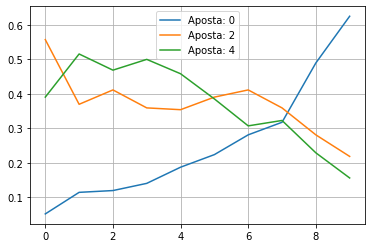

In [117]:
plt.plot(matrix_raw_clima[0], label="Aposta: 0")
plt.plot(matrix_raw_clima[1], label="Aposta: 2")
plt.plot(matrix_raw_clima[2], label="Aposta: 4")

plt.legend()
plt.grid()

plt.savefig('prob_total')

In [131]:
total_evo

index   c1   c2   c3   c4   c5   c6   c7   c8   c9  ...   e1   e2  \
0      user1  2.0  0.0  2.0  4.0  2.0  0.0  4.0  2.0  0.0  ...  2.0  2.0   
1      user2  2.0  2.0  2.0  2.0  2.0  2.0  2.0  4.0  2.0  ...  2.0  4.0   
2      user3  4.0  2.0  2.0  4.0  4.0  4.0  4.0  4.0  2.0  ...  4.0  6.0   
3      user4  4.0  2.0  4.0  4.0  4.0  4.0  2.0  2.0  0.0  ...  4.0  6.0   
4      user5  2.0  4.0  2.0  0.0  0.0  2.0  2.0  4.0  2.0  ...  2.0  6.0   
..       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
493  user206  4.0  4.0  4.0  4.0  4.0  4.0  0.0  0.0  0.0  ...  4.0  8.0   
494  user207  2.0  4.0  2.0  4.0  2.0  0.0  0.0  0.0  0.0  ...  2.0  6.0   
495  user208  2.0  4.0  4.0  4.0  4.0  2.0  0.0  0.0  0.0  ...  2.0  6.0   
496  user209  4.0  4.0  4.0  4.0  2.0  0.0  0.0  0.0  0.0  ...  4.0  8.0   
497  user210  4.0  4.0  4.0  4.0  4.0  4.0  4.0  0.0  2.0  ...  4.0  8.0   

       e3    e4    e5    e6    e7    e8    e9   e10  
0     4.0   8.0  10.0  10.0  14.0  16.0  16.0  16.0  
1     6.0   8.0  10.0  12.0  14.0  18.0  20.0  20.0  
2     8.0  12.0  16.0  20.0  24.0  28.0  30.0  30.0  
3    10.0  14.0  18.0  22.0  24.0  26.0  26.0  26.0  
4     8.0   8.0   8.0  10.0  12.0  16.0  18.0  20.0  
..    ...   ...   ...   ...   ...   ...   ...   ...  
493  12.0  16.0  20.0  24.0  24.0  24.0  24.0  24.0  
494   8.0  12.0  14.0  14.0  14.0  14.0  14.0  14.0  
495  10.0  14.0  18.0  20.0  20.0  20.0  20.0  20.0  
496  12.0  16.0  18.0  18.0  18.0  18.0  18.0  18.0  
497  12.0  16.0  20.0  24.0  28.0  28.0  30.0  30.0  

[498 rows x 21 columns]

In [148]:
markov_aigua = {}

for index, user in total_evo.iterrows():

        chain_markov = []
        for j in range(1, 10):
            var = int(user['c'+ str(j + 1)]) - int(user['c'+ str(j)])
            if (var == 0):
                chain_markov.append(0)
            elif (var == 2):
                chain_markov.append(1)
            elif (var == -2):
                chain_markov.append(2)
            elif (var == 4):
                chain_markov.append(3)
            else:
                chain_markov.append(4)
        chain_markov.append(index)
        markov_aigua['user%s' % i] = chain_markov
markov_aigua = pd.DataFrame.from_dict(markov_aigua, columns=['m1','m2','m3','m4','m5','m6','m7','m8','m9', 'index'], orient='index')

In [149]:
markov_aigua

m1  m2  m3  m4  m5  m6  m7  m8  m9  index
user497   0   0   0   0   0   0   4   1   2    497

In [124]:
# We should define each value of probability and start using the algorithms.
matrix_raw_clima = np.zeros(shape=(3, 10))
for i in range(0,10):
    round_markov = np.asarray(total_evo['c'+str(i+1)])
    for j in range(0, 3):
        count = 0
        for num in round_markov:
            if (j*2) == num:
                count += 1
        matrix_raw_clima[j, i] = count/len(round_markov)